# Lecture 5 - Experimental Design, Performance Measures for Regression Tasks, Cross-validation Schemes & The Curse of Dimensionality

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [2]:
def NoisySinusoidalData(N, a, b, sigma):
    '''Generates N data points in the range [a,b) sampled from a sin(2*pi*x) 
    with additive zero-mean Gaussian random noise with standard deviation sigma'''
    
    # N input samples, evenly spaced numbers between [a,b) incrementing by 1/N
    x = np.linspace(a,b,N)
    
    # draw N sampled from a univariate Gaussian distribution with mean 0, sigma standard deviation and N data points
    noise = np.random.normal(0,sigma,N)
    
    # desired values, noisy sinusoidal
    t = np.sin(2*np.pi*x) + noise
    
    return x, t

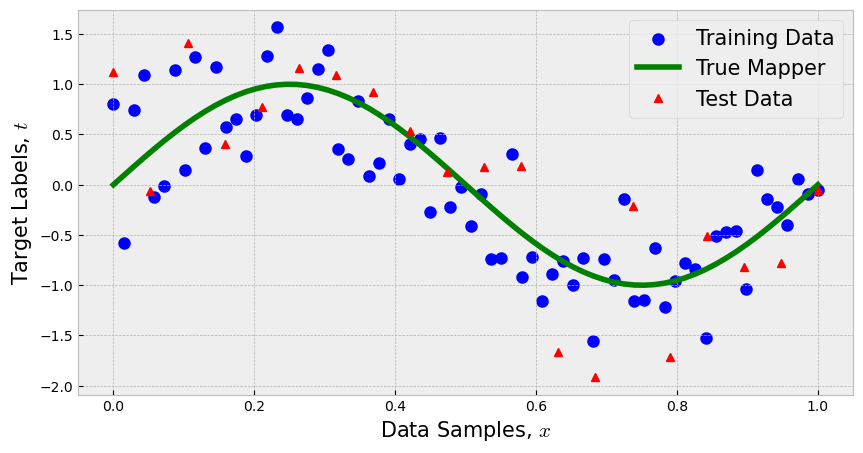

In [3]:
# Generate input samples and desired values
N_train = 70 # number of data samples for training
N_test = 20 # number of data samples for test

a, b = [0,1] # data samples interval

sigma_train = 0.4 # standard deviation of the zero-mean Gaussian noise -- training data
sigma_test = 0.5 # standard deviation of the zero-mean Gaussian noise -- test data

x_train, t_train = NoisySinusoidalData(N_train, a, b, sigma_train) # Training Data - Noisy sinusoidal
x_true, t_true = NoisySinusoidalData(N_train, a, b, 0) # True Sinusoidal - in practice, we don't have the true fct
x_test, t_test = NoisySinusoidalData(N_test, a, b, sigma_test) # Test Data - Noisy sinusoidal

plt.figure(figsize=(10,5))
plt.scatter(x_train, t_train, c='b', linewidths=3, label = 'Training Data')
plt.plot(x_true, t_true, 'g', linewidth=4, label = 'True Mapper')
plt.plot(x_test, t_test, 'r^', label = 'Test Data')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, $x$',size=15)
plt.ylabel('Target Labels, $t$',size=15);

In [4]:
def PolynomialRegression(x,t,M):
    '''Fit a polynomial of order M to the data input data x and desire values t.
    MSE objective function.'''
    
    # Compute feature matrix X with polynomial features
    X = np.array([x**i for i in range(M+1)]).T # this creates an N-by-(M+1) matrix
    
    # Compute the solution for the parameters w, using the MSE ojective function
    w = np.linalg.inv(X.T@X)@X.T@t 
    
    # Compute model prediction
    y = X@w
    
    return w, y

def PolynomialRegression_test(x_test, w):
    '''Use a trained linear regression model with polynomial features for inference.'''
    # Compute test feature matrix
    X_test = np.array([x_test**i for i in range(len(w))]).T # this is a N_test-by-(M+1) matrix
    
    # Prediction for test samples using the trained model
    y_test = X_test@w
    
    return y_test

def PolynomialRegression_reg(x,t,M,lam):
    '''Fit a polynomial of order M to the data input data x and desire values t. 
    MSE objective function with the Ridge regularizer.'''
    
    # Compute feature matrix X with polynomial features
    X = np.array([x**i for i in range(M+1)]).T # this creates an N-by-(M+1) matrix
    
    # Compute the solution for the parameters w, using the MSE ojective function
    w = np.linalg.inv(X.T@X + lam*np.eye(M+1))@X.T@t 
    
    # Compute model prediction
    y = X@w
    
    return w, y

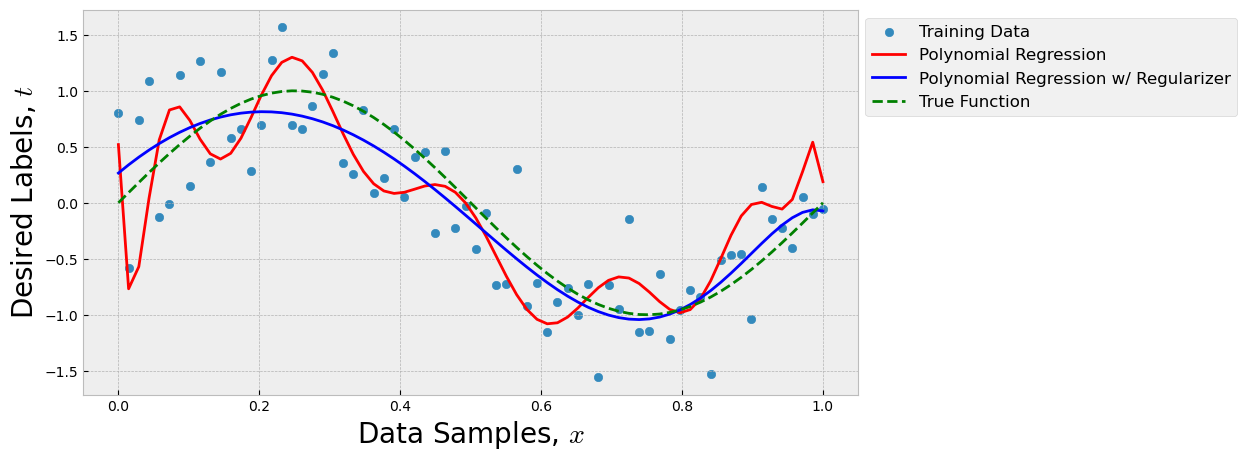

In [5]:
M = 15
lam = 0.001

w, y = PolynomialRegression(x_train,t_train,M) 
w_reg, y_reg = PolynomialRegression_reg(x_train,t_train,M,lam) 

fig=plt.figure(figsize=(10,5))
plt.scatter(x_train,t_train, label='Training Data')
plt.plot(x_train,y,'r', label = 'Polynomial Regression')
plt.plot(x_train,y_reg, 'b',label = 'Polynomial Regression w/ Regularizer')
plt.plot(x_true,t_true,'--g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);
plt.show()

# Performance Measures for Regression Tasks

In order to determine if the model is able to **generalize** to a **validation set**, we need to determine a **performance measure**.

Which measures would you use to compare model performances?

1. Error measures are always a good start for **regression** tasks. Some examples include:

    * Mean Squared Error (MSE) - best when the data does not have outliers. The MSE will penalize outliers heavily.

    * Mean Absolute Error (MAE) - best when you suspect data has outliers.
    
    * Normalized mean squared error (NMSE).
    
    * Normalized mean absolute error (NMAE).

2. Coefficient of Determination $r^2$
    * Advantage: it is bounded between $[0,1]$, where values closer to 1 indicate a better prediction.
    
3. Quantile-Quantile plot (or Q-Q plot)

    * Qualitative measurement of the model predictions vs the target values.
    * The Q-Q plot is used to answer the following questions:
        * Do two data sets come from populations with a common distribution?
        * Do two data sets have common location and scale?
        * Do two data sets have similar distributional shapes?
        * Do two data sets have similar tail behavior?

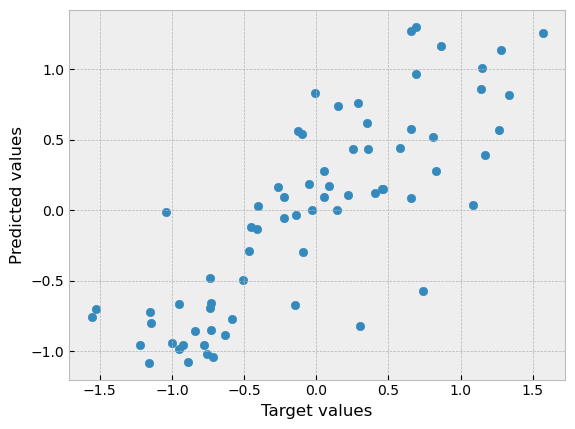

In [6]:
plt.scatter(t_train, y)
plt.xlabel('Target values')
plt.ylabel('Predicted values');

In [7]:
## Predictions in training/test sets with and without regularization
y = PolynomialRegression_test(x_train, w)
y_test = PolynomialRegression_test(x_test, w)

y_reg = PolynomialRegression_test(x_train, w_reg)
y_test_reg = PolynomialRegression_test(x_test, w_reg)

## Error Measures
# Residual error for Training data for polynomial regression without and with regularizer
error_train = t_train - y 
error_train_reg = t_train - y_reg 

# Residual error for Test data for polynomial regression without and with regularizer
error_test = t_test - y_test
error_test_reg = t_test - y_test_reg

# Error Measures
print('Mean Squared Error \n')
print('Training Set')
print('Without regularizer: ', np.mean(error_train**2))
print('With regularizer: ', np.mean(error_train_reg**2),'\n')
print('Test Set')
print('Without regularizer: ', np.mean(error_test**2))
print('With regularizer: ', np.mean(error_test_reg**2),'\n')
print('----------------------------------------------------------------')
print('Mean Absolute Error \n')
print('Training Set')
print('Without regularizer: ', np.mean(np.abs(error_train)))
print('With regularizer: ', np.mean(np.abs(error_train_reg)),'\n')
print('Test Set')
print('Without regularizer: ', np.mean(np.abs(error_test)))
print('With regularizer: ', np.mean(np.abs(error_test_reg)),'\n')

Mean Squared Error 

Training Set
Without regularizer:  0.20444327661371497
With regularizer:  0.15203267196569925 

Test Set
Without regularizer:  0.37670836082928333
With regularizer:  0.32835509297670323 

----------------------------------------------------------------
Mean Absolute Error 

Training Set
Without regularizer:  0.34781656718207804
With regularizer:  0.31758497850818335 

Test Set
Without regularizer:  0.5232536753801202
With regularizer:  0.5035873972508617 



In [8]:
## R2-SCORE

# it measures how much variance in one variance is explained by another variable 

from sklearn.metrics import r2_score

print('Test set without regularization:', r2_score(t_test, y_test))

print('Test set with regularization:', r2_score(t_test, y_test_reg))

Test set without regularization: 0.5986462033315969
Test set with regularization: 0.6501628927707039


The coefficient of determination $r^2$ is bounded between $[0,1]$. The closer to 1, the closer the predictions are to the target value.

In [9]:
## QUANTILES

np.quantile(y, 0.5), np.median(y), np.mean(y)

# median

(0.03486456048980152, 0.03486456048980152, -0.03138699370766865)

In [10]:
np.quantile(y,0), np.min(y)

# minimum

(-1.0806018477933437, -1.0806018477933437)

In [12]:
np.quantile(y, 1), np.max(y)

# maximum

(1.2993581372520955, 1.2993581372520955)

In [13]:
np.linspace(0,1,10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [14]:
np.quantile(y, np.linspace(0,1,10))

array([-1.08060185, -0.94390895, -0.74596665, -0.49708891, -0.02121674,
        0.09751416,  0.2765502 ,  0.55469791,  0.8378803 ,  1.29935814])

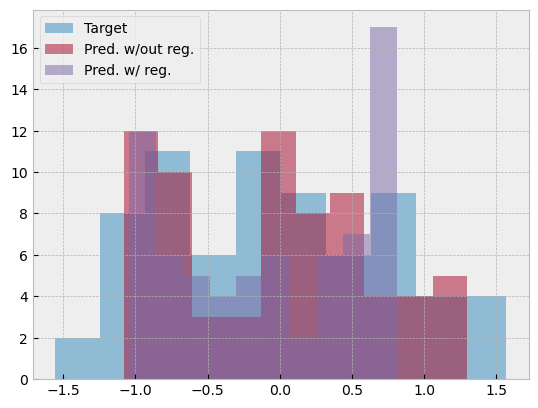

In [17]:
# Histograms of RV samples

plt.hist(t_train, alpha=0.5, label='Target')
plt.hist(y, alpha=0.5, label='Pred. w/out reg.')
plt.hist(y_reg, alpha=0.5, label='Pred. w/ reg.')
plt.legend();

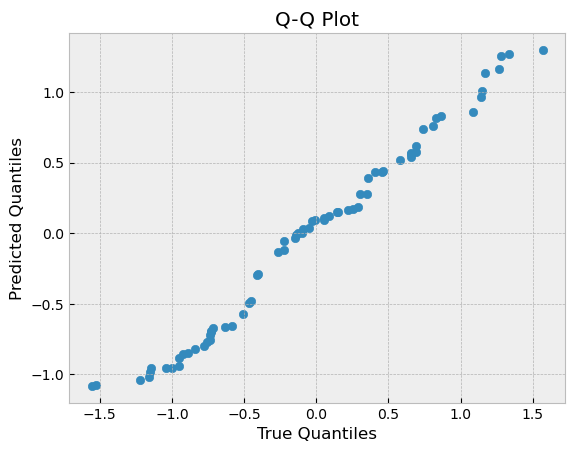

In [15]:
# Q-Q plot

plt.scatter(np.quantile(t_train, np.linspace(0,1,len(t_train))), 
           np.quantile(y, np.linspace(0,1,len(t_train))))
plt.xlabel('True Quantiles')
plt.ylabel('Predicted Quantiles')
plt.title('Q-Q Plot');

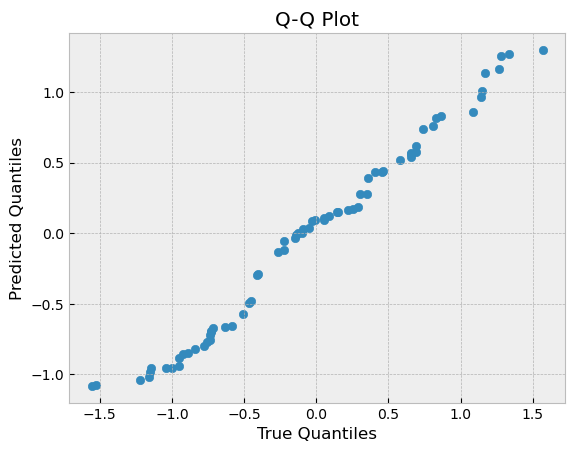

In [16]:
# alternative way to plot the Q-Q plot

plt.scatter(np.sort(t_train), np.sort(y));
plt.xlabel('True Quantiles')
plt.ylabel('Predicted Quantiles')
plt.title('Q-Q Plot');

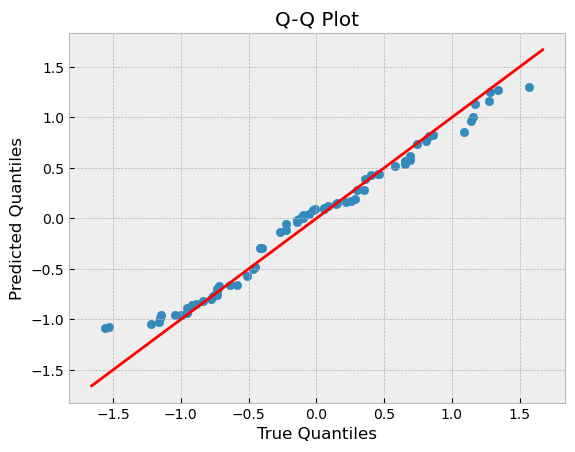

In [18]:
base = np.linspace(min(t_train)-0.1,max(t_train)+0.1,100)
plt.plot(base,base,'r')
plt.scatter(np.sort(t_train), np.sort(y))
plt.xlabel('True Quantiles')
plt.ylabel('Predicted Quantiles')
plt.title('Q-Q Plot');

In [19]:
print('R2 Score for Training without regularizer:', r2_score(np.sort(t_train), np.sort(y)))

print('R2 Score for Test without regularizer:', r2_score(np.sort(t_test), np.sort(y_test)))

R2 Score for Training without regularizer: 0.9743003977521254
R2 Score for Test without regularizer: 0.8586566349466151


In [20]:
print('R2 Score for Training with regularizer:', r2_score(np.sort(t_train), np.sort(y_reg)))

print('R2 Score for Test with regularizer:', r2_score(np.sort(t_test), np.sort(y_test_reg)))

R2 Score for Training with regularizer: 0.9350269752654546
R2 Score for Test with regularizer: 0.8424480436609958


In practice, we consider a good fit if the $r^2$ of the Q-Q plot if **greater than 0.9**, ideally >0.99.

## Other Performance Measures

Performance of an algorithm can be determined using a variety of statistical goodness-of-fit measures. 

* For regression tasks this includes error-based measurements, hypothesis tests, Q-Q plots.
* For classification tasks this includes error rate, accuracy, ROC curves, performance-recall curves.

But it can also be in terms of:
1. Risk,
2. Training time,
3. Training storage/memory,
4. Testing time,
5. Testing storage/memory,
6. Interpretability, namely, whether the method allows knowledge extraction which can be checked and validated by experts, and
7. computational complexity.

---

# Strategies to Mitigate Overfitting

1. Add more data! - when possible

2. Occam's Razor - select a model with lower complexity

3. Regularization - constrains/regularizes the coefficients of the model

4. Cross-validation - technique for utilizing the training data to fine-tune hyperparameter values

---

# Cross-Validation

The goal of **cross-validation**, or CV, is to test the model's ability to predict new data that was not used in estimating the model, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset).

Cross-validation allows us to determine the values for the hyperparameter that provide the most **generalization**. Cross-validation mitigates the occurrrence of overfitting, but it does not eliminate it entirely.

Suggested reading: 

* [Sections 19.1-19.6](https://ufl.instructure.com/courses/455013/external_tools/412362?display=borderless) from the Alpaydin textbook 
* [Section 5.3 Hyperparameters and Model Validation](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html) from the "Python Data Science Handbook" textbook.

## Strategies of Experimentation - Fine-Tuning Hyperparameters

To fully test a system, you want to try to evaluate each of these parameters separately. However, this is often not easily done.

A few strategies for fine-tuning hyperparameters include:

* Best guess
* One factor at a time
* Factorial design or **grid search**
* Randomized search

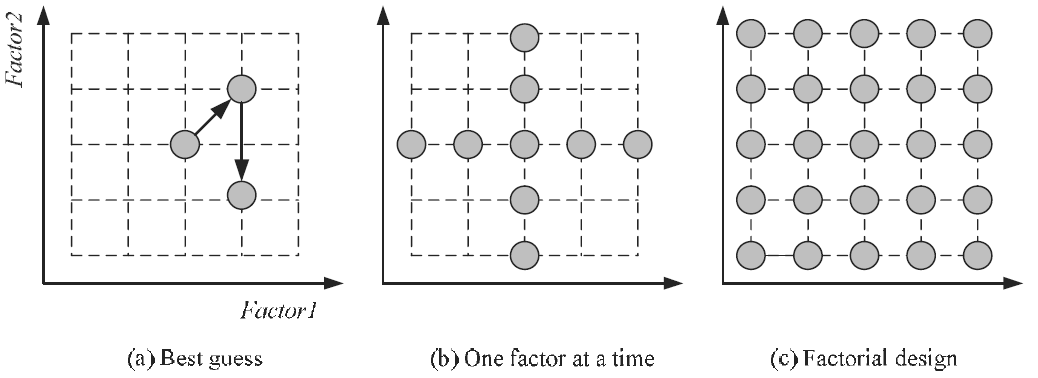

In [21]:
from IPython.display import Image
Image('figures/Experimentation.png',width=800)
# Source: Alpaydin, E. (2014) Introduction to Machine Learning. 3rd edition, MIT Press.

We first must select a **performance measure**, e.g. mean square error (MSE), coefficient of determination $r^2$. There are different strategies for implementing cross-validation:

1. $k\times 2$ cross-validation
2. k-fold cross-validation
3. Leave-One-Out cross-validation
4. Stratified cross-validation

We also need to make sure that classes are represented in the right proportions when subsets of data are held out, not to disturb the class prior probabilities; this is called **stratiﬁcation**. If a class has 20 percent examples in the whole dataset, in all samples drawn from the dataset, it should also have approximately 20 percent examples.

## $1\times 2$ cross-validation

Let's consider the case, where we only have a single validation set which resulted from splitting the training data into a training set and a validation set with splitting rations 70% and 30% respectively.

In [22]:
from sklearn.model_selection import train_test_split

x_train2, x_validation, t_train2, t_validation = train_test_split(x_train, t_train, 
                                                                  test_size=0.3,
                                                                  shuffle=True,
                                                                 random_state=0)

x_train2.shape, x_validation.shape, t_train2.shape, t_validation.shape

((49,), (21,), (49,), (21,))

Let's now vary the values for $M$ and estimate the associated coefficients $\mathbf{w}$ using the training set. Then, let's evaluate performance measure (e.g. MSE) in both training and validation sets:

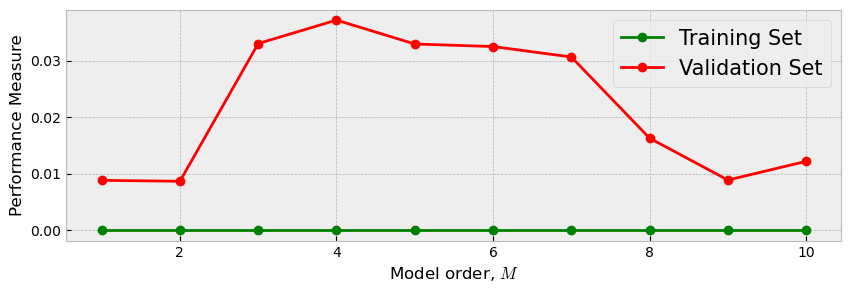

In [23]:
# Range of values for M
M_vals = range(1,11)

perf_train = []
perf_val = []
for M in M_vals:
    
    # Train the model (without regularization for simplicity of illustration)
    w, y_train = PolynomialRegression(x_train2, t_train2, M)
    
    # Make predictions for the training and validation sets
    y_validation = PolynomialRegression_test(x_validation, w)
    
    # Performance Measure (MSE)
    perf_train += [np.mean(t_train2-y_train)**2]
    perf_val += [np.mean(t_validation-y_validation)**2]
    
# Plotting results
plt.figure(figsize=(10,3))
plt.plot(M_vals, perf_train, '-og',label='Training Set')
plt.plot(M_vals, perf_val, '-or',label='Validation Set')
plt.legend(fontsize=15)
plt.xlabel('Model order, $M$', size=12)
plt.ylabel('Performance Measure', size=12);

## K-Fold Cross-Validation

The technique of k-fold cross-validation, illustrated below for the case of $k=4$, involves taking the available data and partitioning it into $k$ groups (in the simplest case these are of equal size). Then $k-1$ of the groups are used to train a set of models that are then evaluated on the remaining group. This procedure is then repeated for all $k$ possible choices for the held-out group, indicated in the picture below by the red blocks, and the performance scores from the runs are then averaged.

$K$ is typically 10 or 30. As $K$ increases, the percentage of training instances increases and we get more robust estimators, but the validation set becomes smaller. Furthermore, there is the cost of training the classiﬁer $K$ times, which increases as $K$ is increased. As $N$ increases, $K$ can be smaller; if $N$ is small, $K$ should be large to allow large enough training sets.

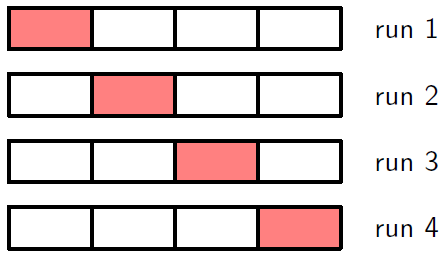

In [24]:
Image('figures/Kfold CV.png',width=400)

In [25]:
from sklearn.model_selection import KFold

KFold?

**Goal:** find the best value for the **hyperparameters** $M$ (model order) and $\lambda$ (regularization trade-off parameter).

Let's use **4-fold cross-validation** on this data:

In [39]:
k = 4 # number of folds

kf = KFold(n_splits=k,shuffle=True, random_state=0)
kf

KFold(n_splits=4, random_state=None, shuffle=True)

In [40]:
# Split training feature matrix into training and validation sets

f=1
for train_index, validation_index in kf.split(x_train):
    print('Fold ', f)
    print('The training set has ', train_index.shape[0],' samples')
    print('Their index locations are: ', train_index)
    print('The validation set has ', validation_index.shape[0],' samples')
    print('Their index locations are: ', validation_index,'\n')
    f+=1

# [ 9 15 17 18 24 27 29 34 36 37 40 44 45 49 54 64 65 68]

Fold  1
The training set has  52  samples
Their index locations are:  [ 0  1  2  3  6  8  9 10 11 12 13 14 16 17 18 19 20 21 23 24 25 26 27 28
 29 30 31 32 35 36 39 40 42 43 47 49 50 51 52 53 55 56 57 58 59 60 61 63
 64 67 68 69]
The validation set has  18  samples
Their index locations are:  [ 4  5  7 15 22 33 34 37 38 41 44 45 46 48 54 62 65 66] 

Fold  2
The training set has  52  samples
Their index locations are:  [ 0  4  5  7  8  9 10 11 12 13 15 18 19 22 24 25 26 27 29 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 52 54 55 56 57 59 60 62 63 64
 65 66 67 69]
The validation set has  18  samples
Their index locations are:  [ 1  2  3  6 14 16 17 20 21 23 28 30 31 51 53 58 61 68] 

Fold  3
The training set has  53  samples
Their index locations are:  [ 1  2  3  4  5  6  7  8 11 12 14 15 16 17 18 20 21 22 23 24 25 27 28 30
 31 32 33 34 35 36 37 38 39 41 44 45 46 48 49 51 52 53 54 55 58 60 61 62
 63 65 66 67 68]
The validation set has  17  samples
Their index locations are: 

In [28]:
from sklearn.metrics import r2_score # performance measure

# Set of values for lambda to explore
M_vals = np.array(range(2,11))
lam_vals= np.arange(0.01,1.1,0.01)

# Average validation score approach in K-fold CV
avg_train = np.zeros((len(M_vals), len(lam_vals)))
avg_valid   = np.zeros((len(M_vals), len(lam_vals)))

for i in range(len(M_vals)):
    for j in range(len(lam_vals)):
    
        M   = M_vals[i]
        lam = lam_vals[j]
        print('M Value = ',M)
        print('Lambda Value = ',lam)
    
        # For each training/validation split
        f=1
    
        #initialize performance measures
        perf_train_avg, perf_val_avg = 0, 0
    
        for train_index, validation_index in kf.split(x_train):
            print('\nFold ',f)
    
            # Select training set using the indices found from kf.split
            x_train2, x_validation = x_train[train_index], x_train[validation_index]
    
            # Select validation set using the indices found from kf.split
            t_train2, t_validation = t_train[train_index], t_train[validation_index]
    
            # Training model with training set
            w, y_train = PolynomialRegression_reg(x_train2, t_train2, M, lam)
    
            # Evaluate trained model in validation set
            y_val = PolynomialRegression_test(x_validation, w)
    
            # Performance Measure (r^2 score of predictions)
            perf_train = r2_score(t_train2,y_train) #np.mean((t_train2-y_train)**2)
            perf_val   = r2_score(t_validation, y_val) #np.mean((t_validation-y_val)**2)
    
            # Average performance measure
            perf_train_avg = perf_train_avg + perf_train
            perf_val_avg = perf_val_avg + perf_val
            print('Performance Training = ', perf_train)
            print('Performance Validation = ', perf_val)
            f+=1

        # Average Performance
        avg_train[i,j] = perf_train_avg/k
        avg_valid[i,j] = perf_val_avg/k

        print('\nAverage Performance in Training = ', avg_train[i,j])
        print('Average Performance in Validation = ', avg_valid[i,j])
        print('-----------------------------------------------------\n')

M Value =  2
Lambda Value =  0.01

Fold  1
Performance Training =  0.46466946927732133
Performance Validation =  0.36645158784766685

Fold  2
Performance Training =  0.4373265727470126
Performance Validation =  0.5351814231642463

Fold  3
Performance Training =  0.4259089870813718
Performance Validation =  0.35694234951955695

Fold  4
Performance Training =  0.5539559409024889
Performance Validation =  0.2454894948480698

Average Performance in Training =  0.4704652425020487
Average Performance in Validation =  0.37601621384488493
-----------------------------------------------------

M Value =  2
Lambda Value =  0.02

Fold  1
Performance Training =  0.46428450360971196
Performance Validation =  0.3588521160737447

Fold  2
Performance Training =  0.4368970960549976
Performance Validation =  0.5310118450590449

Fold  3
Performance Training =  0.42514508351889246
Performance Validation =  0.35747998747647647

Fold  4
Performance Training =  0.5530554553507099
Performance Validation =  0.


Fold  1
Performance Training =  0.4331128003113953
Performance Validation =  0.26018036467688344

Fold  2
Performance Training =  0.4034973245081366
Performance Validation =  0.44429187921785473

Fold  3
Performance Training =  0.37598732593198236
Performance Validation =  0.2693711873582453

Fold  4
Performance Training =  0.4897538311299535
Performance Validation =  0.29484943707244715

Average Performance in Training =  0.4255878204703669
Average Performance in Validation =  0.31717321708135765
-----------------------------------------------------

M Value =  3
Lambda Value =  1.06

Fold  1
Performance Training =  0.43273583193526144
Performance Validation =  0.2595658981686806

Fold  2
Performance Training =  0.4031203518904316
Performance Validation =  0.4436652438895674

Fold  3
Performance Training =  0.37545129944326516
Performance Validation =  0.2685078844491471

Fold  4
Performance Training =  0.4891499576772317
Performance Validation =  0.2946813414044469

Average Performa


Fold  1
Performance Training =  0.6355317278163133
Performance Validation =  0.6717706087791937

Fold  2
Performance Training =  0.6165776815212913
Performance Validation =  0.7280974597363212

Fold  3
Performance Training =  0.6193313055584242
Performance Validation =  0.5487507554315767

Fold  4
Performance Training =  0.7140096976643424
Performance Validation =  0.4361222626182266

Average Performance in Training =  0.6463626031400929
Average Performance in Validation =  0.5961852716413296
-----------------------------------------------------

M Value =  6
Lambda Value =  0.12

Fold  1
Performance Training =  0.6317343754829562
Performance Validation =  0.6718248140215977

Fold  2
Performance Training =  0.6131357983467924
Performance Validation =  0.7254085093672908

Fold  3
Performance Training =  0.6162650700020984
Performance Validation =  0.5440151793234308

Fold  4
Performance Training =  0.7119750192700671
Performance Validation =  0.4330770594015707

Average Performance in 

Performance Training =  0.5980068730016219
Performance Validation =  0.7129180109415797

Fold  3
Performance Training =  0.6049693903554381
Performance Validation =  0.514664370719221

Fold  4
Performance Training =  0.7028179101758493
Performance Validation =  0.42728608500776366

Average Performance in Training =  0.6308191369996954
Average Performance in Validation =  0.5795237654154128
-----------------------------------------------------

M Value =  7
Lambda Value =  0.25

Fold  1
Performance Training =  0.6158260935288908
Performance Validation =  0.6630616510569453

Fold  2
Performance Training =  0.5964813320800035
Performance Validation =  0.7113909578173954

Fold  3
Performance Training =  0.6036116382774747
Performance Validation =  0.5121523120323624

Fold  4
Performance Training =  0.7017749938892819
Performance Validation =  0.4263477014793554

Average Performance in Training =  0.6294235144439128
Average Performance in Validation =  0.5782381555965146
-------------------

Performance Training =  0.5894067727722061
Performance Validation =  0.47504288636885705

Fold  4
Performance Training =  0.688093103536028
Performance Validation =  0.42157825422498196

Average Performance in Training =  0.6140484911025317
Average Performance in Validation =  0.5603579593390899
-----------------------------------------------------

M Value =  8
Lambda Value =  0.48

Fold  1
Performance Training =  0.5985505865917873
Performance Validation =  0.6525740548693539

Fold  2
Performance Training =  0.5781734104495158
Performance Validation =  0.6905524999068333

Fold  3
Performance Training =  0.5885277829651496
Performance Validation =  0.47330235175396707

Fold  4
Performance Training =  0.6872804809713581
Performance Validation =  0.42112516919295484

Average Performance in Training =  0.6131330652444527
Average Performance in Validation =  0.5593885189307772
-----------------------------------------------------

M Value =  8
Lambda Value =  0.49

Fold  1
Performance Tra

Performance Training =  0.6974683154200602
Performance Validation =  0.7610358484603521

Fold  3
Performance Training =  0.6843849765472441
Performance Validation =  0.6462304289438021

Fold  4
Performance Training =  0.7564968720957356
Performance Validation =  0.5345830725323302

Average Performance in Training =  0.7113655804520574
Average Performance in Validation =  0.6214883044320119
-----------------------------------------------------

M Value =  9
Lambda Value =  0.02

Fold  1
Performance Training =  0.6899013611347975
Performance Validation =  0.4899181382398764

Fold  2
Performance Training =  0.6710355212336381
Performance Validation =  0.7552229169973699

Fold  3
Performance Training =  0.6635739234622683
Performance Validation =  0.6155359449898777

Fold  4
Performance Training =  0.7418923084020909
Performance Validation =  0.5029665085715332

Average Performance in Training =  0.6916007785581987
Average Performance in Validation =  0.5909108771996643
-------------------

Performance Training =  0.5851801758532491
Performance Validation =  0.45943328439529685

Fold  4
Performance Training =  0.6827119126959136
Performance Validation =  0.4215072690107061

Average Performance in Training =  0.6093516401049908
Average Performance in Validation =  0.5529282464343789
-----------------------------------------------------

M Value =  9
Lambda Value =  0.61

Fold  1
Performance Training =  0.5950453726897571
Performance Validation =  0.6459218908666992

Fold  2
Performance Training =  0.5728368324763601
Performance Validation =  0.6835891430457453

Fold  3
Performance Training =  0.5844569250333798
Performance Validation =  0.45793135318842115

Fold  4
Performance Training =  0.6820051102518351
Performance Validation =  0.42114677274631074

Average Performance in Training =  0.608586060112833
Average Performance in Validation =  0.5521472899617941
-----------------------------------------------------

M Value =  9
Lambda Value =  0.62

Fold  1
Performance Trai

Performance Training =  0.5583764881960198
Performance Validation =  0.4077023119751655

Fold  4
Performance Training =  0.6555681147954553
Performance Validation =  0.4079694325322777

Average Performance in Training =  0.581366196863429
Average Performance in Validation =  0.5213195415680644
-----------------------------------------------------

M Value =  9
Lambda Value =  0.98

Fold  1
Performance Training =  0.5656534570390908
Performance Validation =  0.6224799159516341

Fold  2
Performance Training =  0.5443648264301144
Performance Validation =  0.6452211308856846

Fold  3
Performance Training =  0.5576566167345447
Performance Validation =  0.40640246808916025

Fold  4
Performance Training =  0.6548202691320824
Performance Validation =  0.4075966911614819

Average Performance in Training =  0.5806237923339581
Average Performance in Validation =  0.5204250515219901
-----------------------------------------------------

M Value =  9
Lambda Value =  0.99

Fold  1
Performance Traini

Performance Training =  0.575542851951311
Performance Validation =  0.6309631708535911

Fold  2
Performance Training =  0.5524858287659358
Performance Validation =  0.6561238968754238

Fold  3
Performance Training =  0.5659254584688762
Performance Validation =  0.4156971635828024

Fold  4
Performance Training =  0.6622597233591373
Performance Validation =  0.4126443713573643

Average Performance in Training =  0.5890534656363151
Average Performance in Validation =  0.5288571506672954
-----------------------------------------------------

M Value =  10
Lambda Value =  0.96

Fold  1
Performance Training =  0.5748313155369693
Performance Validation =  0.6304755027344843

Fold  2
Performance Training =  0.5518112555615966
Performance Validation =  0.6551909314859219

Fold  3
Performance Training =  0.565286888563052
Performance Validation =  0.4144484633355753

Fold  4
Performance Training =  0.6615924602982725
Performance Validation =  0.41231698649299153

Average Performance in Training 

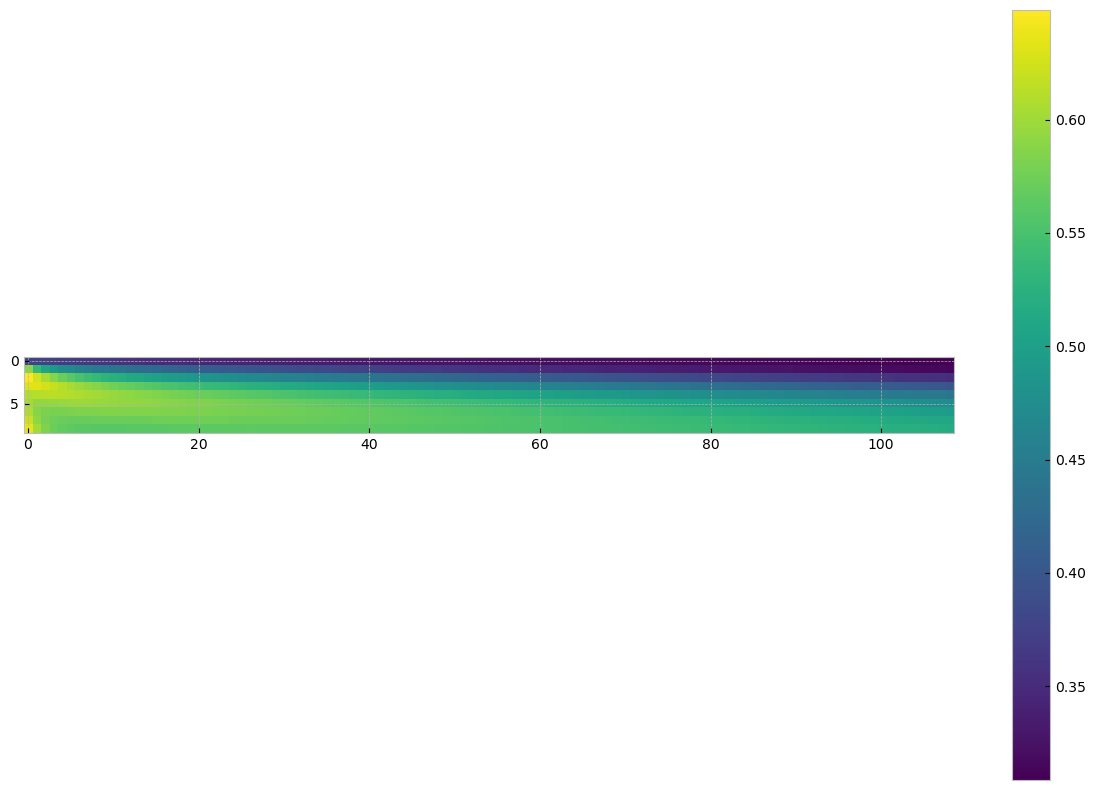

In [32]:
plt.figure(figsize=(15,10))
plt.imshow(avg_valid);
plt.colorbar();

In [33]:
##################

# Note that we should be looking for the minimum MSE (not the maximum!)

best_m_val, best_lam_val = np.where(avg_valid==np.max(avg_valid))

print('Best M value = ', M_vals[best_m_val])
print('Best lambda value = ', lam_vals[best_lam_val])

Best M value =  [4]
Best lambda value =  [0.01]


## Refit the Model

Once the optimal hyperaparameters have been identified, the final model is trained using **all of the training data** (including the samples previously used for validation).

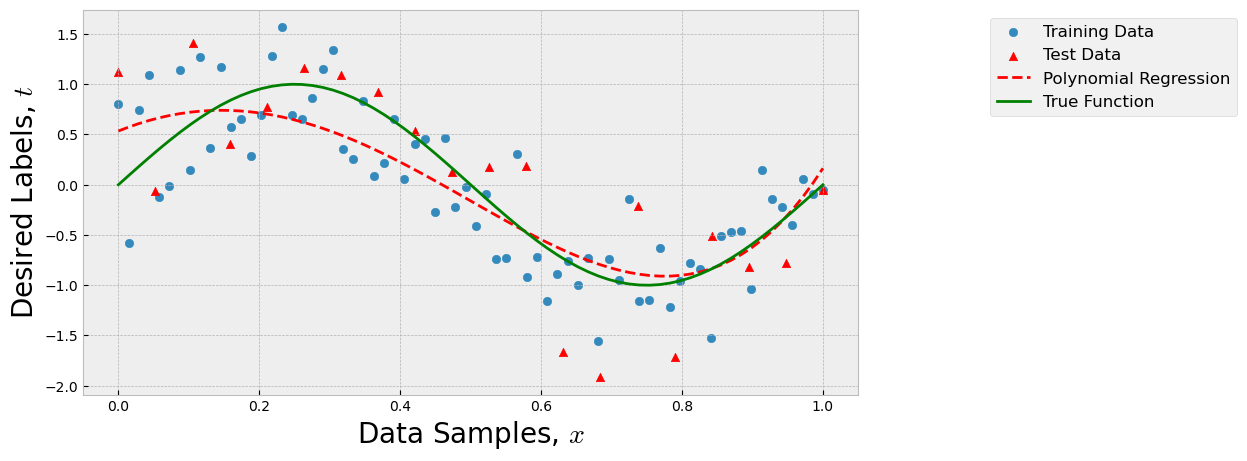

In [34]:
w, y_train = PolynomialRegression_reg(x_train, t_train, M_vals[best_m_val][0], lam_vals[best_lam_val][0])
y_test = PolynomialRegression_test(x_test, w)

fig=plt.figure(figsize=(10,5))
plt.scatter(x_train,t_train, label='Training Data')
plt.scatter(x_test,t_test, c='r', marker='^', label='Test Data')
plt.plot(x_train,y_train,'--r', label = 'Polynomial Regression')
plt.plot(x_true,t_true,'g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

In [36]:
print('Training r2-score:', r2_score(t_train, y_train))
print('Test r2-score:', r2_score(t_test, y_test))

x_train.shape, x_test.shape

Training r2-score: 0.7072627327755109
Test r2-score: 0.6245592992253381


((70,), (20,))

#### Discussion

* We select the set of hyperparameters $\{M,\lambda\}$ with the best performance score (e.g. smallest MSE or largest $r^2$).

* If the value of the hyperparameter falls at the edge of provided range of values, it is appropriate to expand the range of values for further exploration.

* Other performance measures can be used, for example, the coefficient of determination of the Q-Q plot for regression tasks, or accuracy score for classification tasks.

---

## Leave-One-Out Cross-Validation

One extreme case of cross-validation is the **leave-one-out** where given a dataset of $N$ instances, only one instance is left out as the validation set (instance) and training uses the $N − 1$ instances. We then get $N$ separate pairs by leaving out a different instance at each iteration. This is typically used in applications such as medical diagnosis, where labeled data is hard to ﬁnd. Leave-one-out **does not permit stratiﬁcation**.

---

<div class="alert alert-info">
    <b>The No Free Lunch Theorem</b> 

The No Free Lunch Theorem states that there is no single learning algorithm that in any domain always induces the most accurate learner. The usual approach is to try many and choose the one that performs the best on a separate validation set.
    
For any learning algorithm, there is a dataset where it is very accurate and another dataset where it is very poor. When we say that a learning algorithm is good, we only quantify how well its inductive bias matches the properties of the data.
</div>

---

# The Curse of Dimensionality

The Curse of Dimensionality illustrates various phenomena that arise when we work with high-dimensional data spaces that would not otherwise occur in lower-dimensional settings (such as the 3-dimensional space).

> ## Our intuitions do not hold in high-dimensional spaces 🤔

Let's illustrate this with two examples.

## Example 1: Volume of a Crust

Consider two embedded spheres, $S_1$ and $S_2$, where sphere $S_1$ has radius $r$, sphere $S_2$ has radius $r-\epsilon$, with $0<\epsilon<r$.

Let's calculate the ratio between the volume of the crust and the volume of the outer sphere $S_1$:

\begin{align*}
\text{ratio} = \frac{V_{crust}}{V_{S_1}} = \frac{V_{S_1} - V_{S_2}}{V_{S_1}}
\end{align*}

* The $D$-dimensional [volume of a sphere of radius $r$ in $D$-dimensional space](https://en.wikipedia.org/wiki/Volume_of_an_n-ball) is: $V = \frac{r^D \pi^{\frac{D}{2}}}{\Gamma\left(\frac{D}{2}+1\right)}$, then

\begin{align*}
\text{ratio} &= \frac{V_{S_1} - V_{S_2}}{V_{S_1}} \\
&= 1-\frac{V_{S_2}}{V_{S_1}} \\
&= 1-\frac{\frac{(r-\epsilon)^D \pi^{\frac{D}{2}}}{\Gamma\left(\frac{D}{2}+1\right)}}{\frac{r^D \pi^{\frac{D}{2}}}{\Gamma\left(\frac{D}{2}+1\right)}} \\
&= 1 - \frac{(r-\epsilon)^D}{r^D}\\
&= 1 - \frac{r^D\left(1-\frac{\epsilon}{r}\right)^D}{r^D}\\
&= 1 - \left(1-\frac{\epsilon}{r}\right)^D
\end{align*}

* For a fixed value for $\epsilon$, a fixed radius $r$ and $\epsilon<r$, what happens as $D$ increases?

In [ ]:
# Crust volume between spheres with epsilon different radii and increasing dimensionality

r = 1 # radius of outer sphere
eps = 0.001 # epsilon value
D = range(1,10000) # dimensionality
RatioVol = [1-(1-eps/r)**d for d in D] # ratio of the volume as a function of dimensionality D
plt.plot(D, RatioVol) # plotting results
plt.ylabel('ratio$=1 - (1 - \epsilon/r)^D$',size=15)
plt.xlabel('(Feature Space) Dimensionality, D',size=15);

> ### 🤯 Let's see another example!

## Example 2: Unit Porcupine

Consider the unit porcupine which is represented as a unit hypersphere inscribed within a unit hypercube.

Recall that the $D$-dimensional volume of a $D$-dimensional cube with radius $r$ is $(2r)^D$.

* What happens to the ratio between the volume of the sphere and the volume of the cube as dimensionality $D$ increases?

\begin{align*}
\frac{V(\text{sphere})}{V(\text{cube})} &= \frac{\frac{r^D \pi^{\frac{D}{2}}}{\Gamma\left(\frac{D}{2}+1\right)}}{(2r)^D}\\
&= \frac{r^D \pi^{\frac{D}{2}}}{(2r)^D\Gamma\left(\frac{D}{2}+1\right)}\\
&= \frac{\pi^{\frac{D}{2}}}{2^D\Gamma\left(\frac{D}{2}+1\right)}
\end{align*}

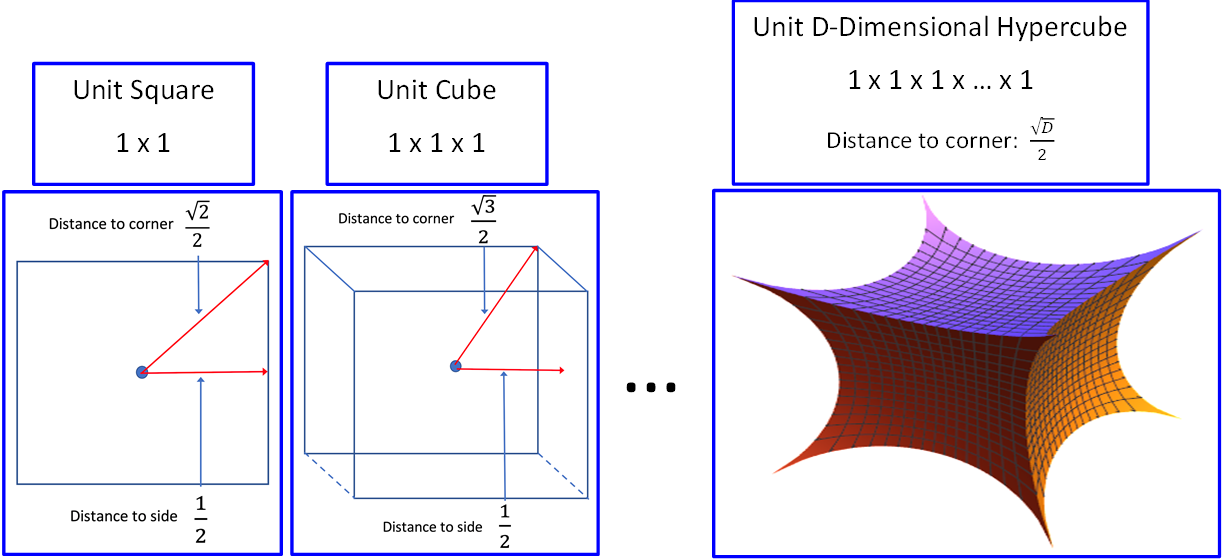

In [41]:
Image('figures/hypercube.png',width=1000)

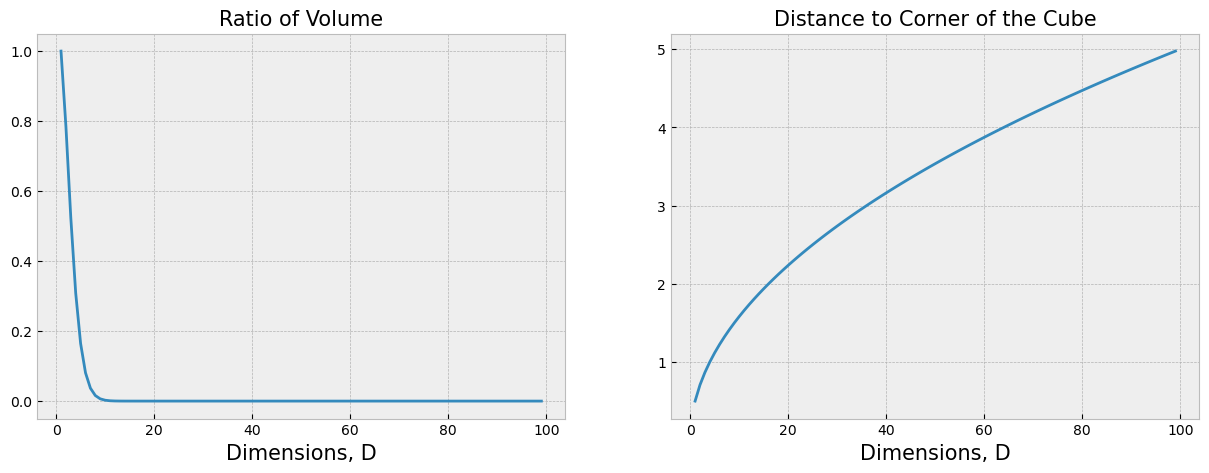

In [42]:
# The Unit Porcupine (the unit hyper-sphere inscribed within the unit hyper-cube)

import math

D = range(1,100) # dimensionality, D
V = [np.pi**(i/2)/(2**i*math.gamma(i/2 + 1)) for i in D] # ratio as a function of dimensionality D
dist_to_Corner = [math.sqrt(d)/2 for d in D] # distance 

# plotting
plt.figure(figsize=(15,5))
plt.subplot(1,2,1); plt.plot(D, V) 
plt.title('Ratio of Volume',size=15)
plt.xlabel('Dimensions, D',size=15)

plt.subplot(1,2,2)
plt.plot(D, dist_to_Corner) 
plt.title('Distance to Corner of the Cube',size=15)
plt.xlabel('Dimensions, D',size=15);

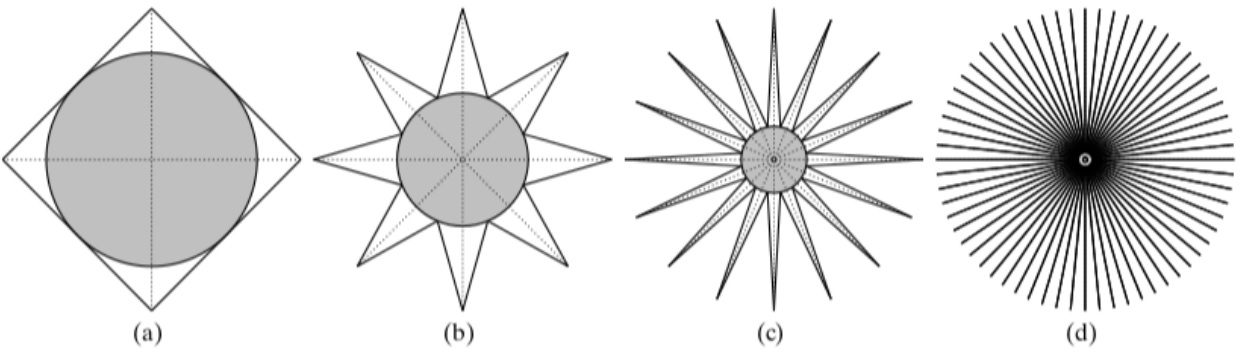

In [43]:
Image('figures/Unit Porcupine.jpg',width=800)

## Discussions

In the unit porcupine example, for higher-dimensionality $D$, all of the volume will reside in the "corners". So, distances between neighboring points is extremely large. The notion of **similarity** as measure by distances becomes a challenge.

As the dimensionality of the feature space increases, we need exponentially more data in order to explain a highly increasing volume.

We need to be careful choosing a model as that choice "injects" what we want the data to look like or follow a specific behavior. For example, in higher-dimensions, the tails of a Gaussian density function will become highly dense.

Always employ the **Occam's Razor** principle: the simplest model that works for our data is usually the most appropriate and sufficient. Model simplicity can mean different things, but we can consider a model to be complex if it has too many hyperparameter values to configure. 

When we are in a high-dimensional input space (such as images), much of that space is empty. The input data can be represented in only a few *degrees of freedom* of variability. We say that the data in *embedded* in a **manifold** of equal dimensionality as the degrees of freedom (which is drastically smaller than the input space dimensionality). We will study a few dimensionality reduction and manifold learning techniques later on in this course.

And again, intuitions or assumptions do not always hold in higher dimensions.

---
---
---